# Introduction

## Automobile Industry (Marketing Domain)- A New Car Launch 

#### Buying a Car is the dream of many. However, every individual decides on a fixed budget before taking any final decision on buying a car. There are several car manufacturers in the market which create various models. A lot of pre- launch research is required before introducing any new model in the market as launching a new car involves a lot of cost and investment in the form of R&D,  marketing, manufacturing and logistics. A wrong market study can lead to huge debt on company’s balance sheet.

#### An automobile company is planning to expand and introduce new models in US market. But before doing that market research is required on what type of cars US citizens prefer, who is more likely to buy cars, what is the income of folks who buys car etc. As a Data Scientist, you have been provided with Car Owners data from US cities. Applying numerical and visual summarization of data, come up with meaningful and beneficial insights.

# Data Description:
#### The data contains several attributes about car owners. Understand what each column represents and create your own dictionary.

# Domain:
#### Manufacturing/Marketing 

# Context:
#### Leveraging customer information is paramount for most businesses. In the case of automobile industry, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

# Attribute Information:
- Income: The annual income of Car owners in Dollars as the data shared is of US manufacturing company
- Marital Status: The car owner is married or not
- Sex: The car owner is male or female
- Education: QUalification of car owner
- Job: What type of job the car owners do
- Use: what is the purpose or use of buying the car 
- Miles Clocked: how much does the car has traveled
- Car type: What type of car the car owner's have
- Car Age: How old is the car
- City: Where does the car owner's live
- Region: In which region does the car owner belongs to

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os


In [2]:
#os.getcwd() # Checking Working directory

In [9]:
df = pd.read_excel('Car Owners Data.xlsx') # read the data as a data frame

In [10]:
df.head()  #checking the head of the data frame

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,Region
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,Southeas
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,Southeas
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,Southeas
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,Southeas
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,Southeas


In [11]:
df.shape

(303, 13)

### The data set contains 303 observations and 13 variables.

#### After looking at the data, it can be seen that there are 13 columns. 
#### However, in general index column here seems like just a serial number which is not useful. 
#### Also, we can see there are certain columns where NaN is written, let's understand more about this data.

#### Before analysing the histogram, we should make sure that whether all the columns are relevant or not. 
#### Index doesnot have any relevance thus it should be dropped.


In [7]:
# We have learnt in previous module on how to drop the columns

In [12]:
df.drop(['INDEX'],axis=1, inplace=True)
df

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,Region
0,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,Southeas
1,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,Southeas
2,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,Southeas
3,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,Southeas
4,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,Southeas
...,...,...,...,...,...,...,...,...,...,...,...,...
298,15251.52473,No,M,High School,Clerical,31.315058,Private,3030.0,Sports Car,1.0,Las Vegas,Southwestern
299,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN
300,NaN,No,M,High School,Clerical,36.533624,Private,7660.0,SUV,NaN,Las Vegas,Southwestern
301,NaN,Yes,F,High School,NaN,60.884292,Private,19550.0,Van,1.0,Las Vegas,Southwestern


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INCOME          260 non-null    float64
 1   MARITAL STATUS  275 non-null    object 
 2   SEX             297 non-null    object 
 3   EDUCATION       259 non-null    object 
 4   JOB             257 non-null    object 
 5   TRAVEL TIME     262 non-null    float64
 6   USE             250 non-null    object 
 7   MILES CLOCKED   278 non-null    float64
 8   CAR TYPE        293 non-null    object 
 9   CAR AGE         283 non-null    float64
 10  CITY            297 non-null    object 
 11  Region          300 non-null    object 
dtypes: float64(4), object(8)
memory usage: 28.5+ KB


# EDA : Exploratory Data Analysis

**We will perform the exploratory data analysis on the dataset now. The major topics to be covered are below:**

- **Removing duplicates**
- **Missing value treatment**
- **Outlier Treatment**
- **Normalization and Scaling( Numerical Variables)**
- **Encoding Categorical variables( Dummy Variables)**


In [14]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 14


,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,Region
69,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
70,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
71,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
72,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
73,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
74,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
75,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
76,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
77,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert
78,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,Southert


## Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records.

In [15]:
df.drop_duplicates(inplace=True) 

### Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.

In [16]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,Region


**Now, we can clearly see that there are no duplicate records in the data set. 
We can also quickly confirm the number of records by using the shape attribute
as those 14 records should be removed from the original data. Initially it had 303 records now it should have 289**

In [17]:
df.shape

(289, 12)

## Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

<Axes: xlabel='INCOME'>

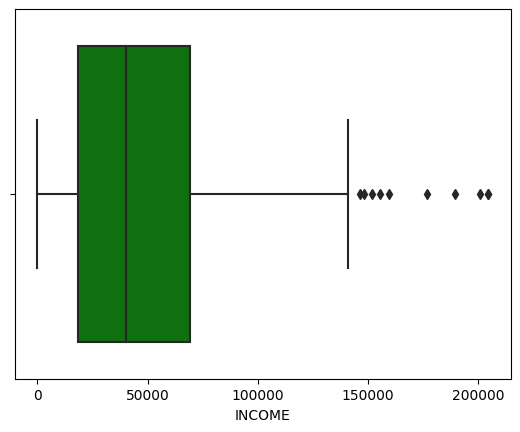

In [18]:
sns.boxplot(data=df,x= 'INCOME', color='green')

<Axes: xlabel='TRAVEL TIME'>

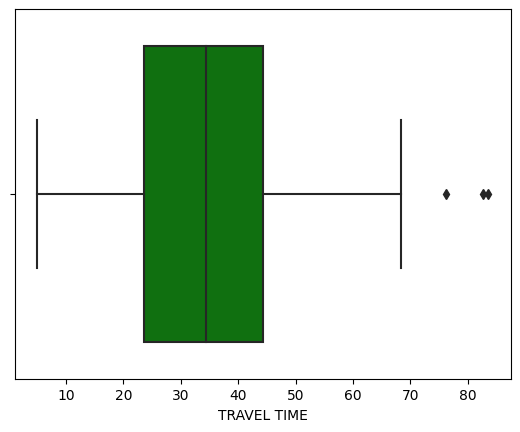

In [19]:
sns.boxplot(data=df, x="TRAVEL TIME", color='green')

<Axes: xlabel='MILES CLOCKED'>

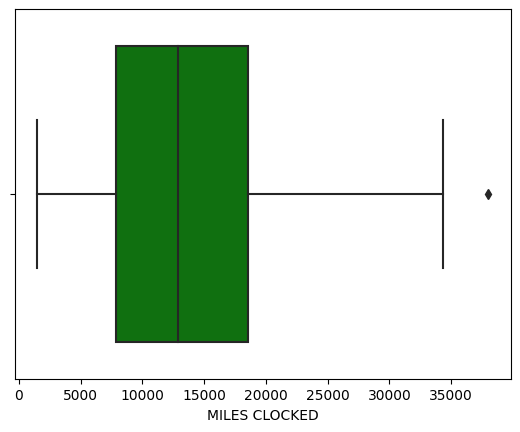

In [20]:
sns.boxplot(data=df, x="MILES CLOCKED", color='green')

**Referring to the above box plots it seems that the three variables INCOME, MILES CLOCKED and TRAVEL TIME have outliers present in the variables.**

**These outlier values needs to be treated and there are several ways of treating them:**
    
- **Drop the outlier value**
- **Replace the outlier value using the IQR**

In [17]:
## We can treat the outliers using percentile  or with Inter quartile Range
## Here, we are using percentile to replace outliers

In [21]:
min_Income, max_Income = df['INCOME'].quantile([0.05,0.95])
print(min_Income)
print(round(max_Income,2))


0.0
135591.62


In [22]:
df["INCOME"] = np.where(df["INCOME"] <  min_Income, min_Income, df["INCOME"])
df["INCOME"] = np.where(df["INCOME"] >  max_Income, max_Income, df["INCOME"])

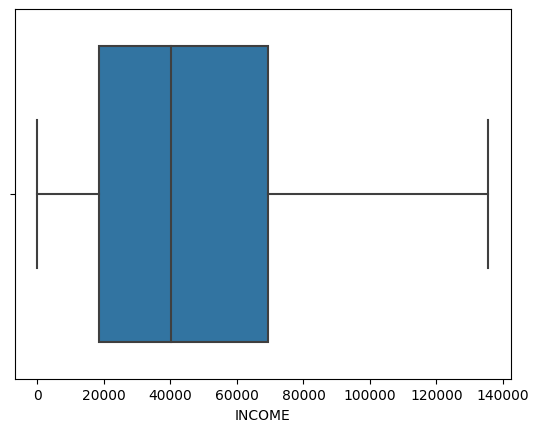

In [23]:
sns.boxplot(x="INCOME", data=df)
plt.show()

In [24]:
min_Traveltime, max_Traveltime = df['TRAVEL TIME'].quantile([0.05,0.95])
print(round(min_Traveltime,2))
print(round(max_Traveltime,2))


10.34
59.65


In [26]:
df["TRAVEL TIME"] = np.where(df["TRAVEL TIME"] <  min_Traveltime, min_Traveltime, df["TRAVEL TIME"])
df["TRAVEL TIME"] = np.where(df["TRAVEL TIME"] >  max_Traveltime, max_Traveltime, df["TRAVEL TIME"])

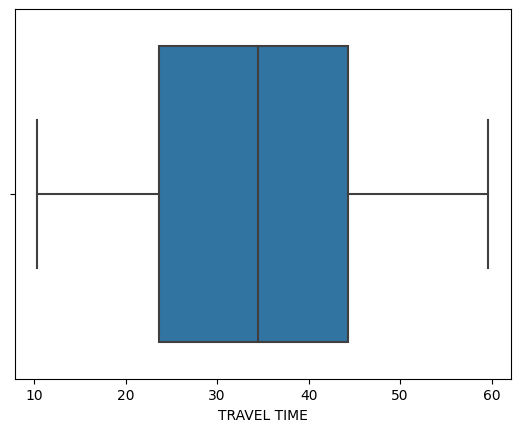

In [27]:
sns.boxplot(x="TRAVEL TIME", data=df)
plt.show()

In [28]:
min_Miles, max_Miles = df['MILES CLOCKED'].quantile([0.05,0.95])
print(round(min_Miles,2))
print(round(max_Miles,2))


4436.5
26441.5


In [29]:
df["MILES CLOCKED"] = np.where(df["MILES CLOCKED"] <  min_Miles, min_Miles, df["MILES CLOCKED"])
df["MILES CLOCKED"] = np.where(df["MILES CLOCKED"] > max_Miles, max_Miles, df["MILES CLOCKED"])

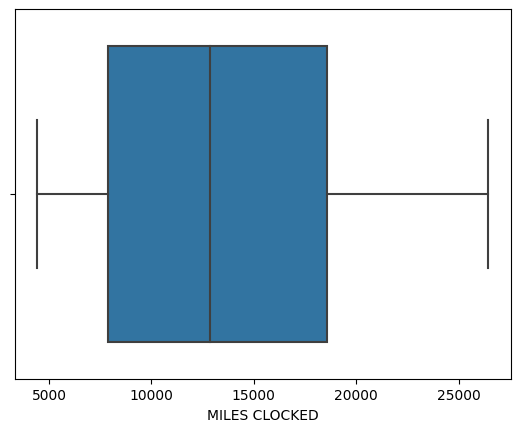

In [30]:
sns.boxplot(x="MILES CLOCKED", data=df)
plt.show()

In [27]:
#Here we have replaced outliers by the upper 95th and the lower 5th percentile values of the distribution

## Check for missing value: Missing Value Treatment

In [31]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
Region             3
dtype: int64

**We can see that we have various missing values in different columns. There are various ways of treating your missing values in the data set. When to use which technique is actually dependent on the type of data you are dealing with.**

- **Drop the missing values : In this case we drop the missing values from those variables if there are very few missing values**

- **Impute with mean value : For numerical column, we can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values i.e. outliers.**

- **Impute with median value : For numerical column, we can also replace the missing values with median values. In case we have extreme values such as outliers it is advisable to use median approach.**

- **Impute with mode value : For categorical column, we can replace the missing values with mode values i.e the most frequent ones.**

**In this exercise, we will replace the numerical columns with median values and for categorical columns we will replace the missing values with mode values.**

In [32]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

INCOME            float64
MARITAL STATUS     object
SEX                object
EDUCATION          object
JOB                object
TRAVEL TIME       float64
USE                object
MILES CLOCKED     float64
CAR TYPE           object
CAR AGE           float64
CITY               object
Region             object
dtype: object

In [33]:
df.describe()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
count,246.000000,248.000000,264.000000,269.000000
mean,47646.185479,34.121680,13743.075758,6.330855
std,37725.143006,14.061536,6553.740959,5.234627
min,0.000000,10.344748,4436.500000,1.000000
25%,18499.955555,23.633340,7880.000000,1.000000
50%,40171.535635,34.426446,12845.000000,6.000000
75%,69429.320040,44.279590,18570.000000,10.000000
max,135591.616200,59.650200,26441.500000,20.000000


**Replacing NULL values in Numerical Columns using Median**

In [35]:
median1=df["INCOME"].median()
median2=df["TRAVEL TIME"].median()
median3=df["MILES CLOCKED"].median()
median4=df["CAR AGE"].median()

df["INCOME"].replace(np.nan,median1,inplace=True)
df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
df["CAR AGE"].replace(np.nan,median4,inplace=True)

**Replacing NULL values in Categorical Columns using Mode**

In [36]:
mode1=df["SEX"].mode().values[0]
mode2=df["MARITAL STATUS"].mode().values[0]
mode3=df["EDUCATION"].mode().values[0]
mode4=df["JOB"].mode().values[0]
mode5=df["USE"].mode().values[0]
mode6=df['CITY'].mode().values[0]
mode7=df["CAR TYPE"].mode().values[0]
mode8=df["Region"].mode().values[0]


df["SEX"]=df["SEX"].replace(np.nan,mode1)
df["MARITAL STATUS"]= df["MARITAL STATUS"].replace(np.nan,mode2)
df["EDUCATION"]=df["EDUCATION"].replace(np.nan,mode3)
df["JOB"]=df["JOB"].replace(np.nan,mode4)
df["USE"]=df["USE"].replace(np.nan,mode5)
df['CITY']=df['CITY'].replace(np.nan,mode6)
df["CAR TYPE"]=df["CAR TYPE"].replace(np.nan,mode7)
df["Region"]=df["Region"].replace(np.nan, mode8)

In [37]:
# Check for missing value in any column
df.isnull().sum()

INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
Region            0
dtype: int64

# Normalizing and Scaling

**Often the variables of the data set are of different scales i.e. one variable is in millions and other is only in 100's. For e.g. in our data set Income is having values in thousands and age is just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

In [38]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [39]:
df['INCOME'] = std_scale.fit_transform(df[['INCOME']])
df['TRAVEL TIME'] = std_scale.fit_transform(df[['TRAVEL TIME']])
df['CAR AGE'] = std_scale.fit_transform(df[['CAR AGE']])
df['MILES CLOCKED']= std_scale.fit_transform(df[['MILES CLOCKED']])

In [40]:
df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,Region
0,2.261052,No,F,Bachelors,Blue Collar,0.887539,Commercial,0.601656,Sports Car,0.137267,Texas,Southeas
1,0.122900,No,M,High School,Blue Collar,-1.044091,Private,0.841384,Minivan,-1.052842,Texas,Southeas
2,0.472027,No,F,Bachelors,Clerical,-0.040382,Private,-0.131113,SUV,-1.052842,Texas,Southeas
3,0.877410,No,F,High School,Lawyer,-1.442238,Private,0.740698,Sports Car,0.930674,Texas,Southeas
4,2.418741,No,M,High School,Blue Collar,0.020117,Commercial,2.041864,Panel Truck,0.732322,Texas,Southeas


In [41]:
df.describe()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
count,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,2.278070e-16,-1.475175e-16,8.912517e-17,1.843969e-17
std,1.001735e+00,1.001735e+00,1.001735e+00,1.001735e+00
min,-1.335783e+00,-1.832306e+00,-1.474950e+00,-1.052842e+00
25%,-7.073837e-01,-6.345155e-01,-8.830611e-01,-1.052842e+00
50%,-1.826389e-01,2.011745e-02,-1.311134e-01,-6.108403e-02
75%,4.982075e-01,6.503180e-01,7.007437e-01,7.323220e-01
max,2.556443e+00,1.960391e+00,2.041864e+00,2.715837e+00


**If you look at the variables INCOME, TRAVEL TIME and CAR AGE, all has been normalized and scaled in one scale now.**

# ENCODING

**One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.**

**This is required because the machine learning algorithms only works on the numerical data. That is why there is a need to convert the categorical column into numerical one.**

**get_dummies is the method which creates dummy variable for each categorical variable.**

**It is very important to set parameter `drop_first` as `True` whenever get_dummies is used. Also without this, one cannot proceed as all procedures will be rank deficient. 

In [42]:
dummies=pd.get_dummies(df[["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY","Region"]], 
                       columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY","Region"], 
                                     prefix=["married", "sex","Education","Job","Use","cartype","city","Region"],
        drop_first=True)
dummies

,married_Yes,sex_M,Education_High School,Education_Masters,Education_PhD,Job_Clerical,Job_Doctor,Job_Home Maker,Job_Lawyer,Job_Manager,...,city_Texas,city_Washington,Region_Northeastern,Region_Northwest,Region_Northwestern,Region_Southeas,Region_Southeast,Region_Southeastern,Region_Southert,Region_Southwestern
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
299,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
300,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
301,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


**Concatenation of dummies and df dataframe is done to get the final data on which further analysis can be done**

In [43]:
columns=["MARITAL STATUS", "SEX","EDUCATION","JOB","USE","CAR TYPE","CITY","Region"]
df = pd.concat([df, dummies], axis=1)

# drop original column "fuel-type" from "df"
df.drop(columns, axis = 1, inplace=True)


In [44]:
df

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,married_Yes,sex_M,Education_High School,Education_Masters,Education_PhD,Job_Clerical,...,city_Texas,city_Washington,Region_Northeastern,Region_Northwest,Region_Northwestern,Region_Southeas,Region_Southeast,Region_Southeastern,Region_Southert,Region_Southwestern
0,2.261052,0.887539,0.601656,0.137267,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.122900,-1.044091,0.841384,-1.052842,False,True,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,0.472027,-0.040382,-0.131113,-1.052842,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
3,0.877410,-1.442238,0.740698,0.930674,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,2.418741,0.020117,2.041864,0.732322,False,True,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.897980,-0.219218,-1.474950,-1.052842,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
299,-0.807361,0.650318,-0.994934,-1.052842,False,True,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
300,-0.182639,0.182207,-0.959774,-0.061084,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
301,-0.182639,1.960391,0.940472,-1.052842,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [45]:
df.isnull().sum()

INCOME                   0
TRAVEL TIME              0
MILES CLOCKED            0
CAR AGE                  0
married_Yes              0
sex_M                    0
Education_High School    0
Education_Masters        0
Education_PhD            0
Job_Clerical             0
Job_Doctor               0
Job_Home Maker           0
Job_Lawyer               0
Job_Manager              0
Job_Professional         0
Job_Student              0
Use_Private              0
cartype_Panel Truck      0
cartype_Pickup           0
cartype_SUV              0
cartype_Sports Car       0
cartype_Van              0
city_Houston             0
city_Las Vegas           0
city_Los Angeles         0
city_New Albany          0
city_New York City       0
city_Philadelphia        0
city_San Francisco       0
city_Seattle             0
city_Texas               0
city_Washington          0
Region_Northeastern      0
Region_Northwest         0
Region_Northwestern      0
Region_Southeas          0
Region_Southeast         0
R

**In the data set, each Category in all of the categorical columns have been added as columns with values 0 and 1**
**Example: married_Yes, sex_M, Education_High School
**If sex_M =1, then it means its a Male and sex_M=0 means its a Female**

## Conclusion:

**From MLS 1 & MLS 2 we are able to understand the data in a better way. We have explored the data and did everything to make data clean and ready for use. 
Please note EDA is just a base to understand the data,  statistical analysis and model building can now be performed on this data.**